In [0]:
pip install fastai

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import necessary libraries
from fastai.vision import * 
import matplotlib.pyplot as plt

In [0]:
import os
import shutil
os.mkdir('jewelry')

In [0]:
os.mkdir('rings')
os.mkdir('bracelets')
os.mkdir('necklaces')
os.mkdir('earrings')

In [0]:
shutil.move('/content/rings','/content/jewelry')
shutil.move('/content/earrings','/content/jewelry')
shutil.move('/content/necklaces','/content/jewelry')
shutil.move('/content/bracelets','/content/jewelry')

##To get images from google
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
from google.colab import files

In [0]:
#upload google images 
files.upload()

{}

In [0]:
shutil.move('/content/braceletplus.csv','/content/drive/My Drive/Jewelry')
shutil.move('/content/earringplus.csv','/content/drive/My Drive/Jewelry')
shutil.move('/content/necklaceplus.csv','/content/drive/My Drive/Jewelry')
shutil.move('/content/ringplus.csv','/content/drive/My Drive/Jewelry')

In [0]:
path = Path('/content/drive/My Drive/Jewelry')

In [0]:
#download google images and erge with drive folder

for file, folder in [('braceletplus.csv', 'bracelet')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

In [0]:
folder_list = ['bracelet', 'earring', 'necklace', 'ring']

In [0]:
#verify images and delete unreadable pictures
for folder in folder_list:
  verify_images(path/folder,max_size = 500,delete = True)

In [0]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pad', '__version__', 'random', 'subplots', 'array', 'uniform', 'partition', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
#Creating Data Bunch
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .random_split_by_pct()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms,size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
data.classes # will give the different classes

['bracelet', 'earring', 'necklace', 'ring']

In [0]:
data

ImageDataBunch;

Train: LabelList (2609 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ring,ring,ring,ring,ring
Path: /content/drive/My Drive/Jewelry;

Valid: LabelList (652 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ring,ring,necklace,necklace,ring
Path: /content/drive/My Drive/Jewelry;

Test: None

In [0]:
data.show_batch(rows=2, figsize=(7, 8))

#Creating Convolutional Neural Net

In [0]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics=error_rate,wd = 0.1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 106MB/s]


In [0]:
# makes sure the gpu is used
defaults.device = torch.device('cuda')

In [0]:
#training on last layers
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.944305,0.551260,0.130368,01:01
1,0.597747,0.410397,0.128834,00:53
2,0.398731,0.348921,0.111963,00:53
3,0.268396,0.337750,0.108896,00:53


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


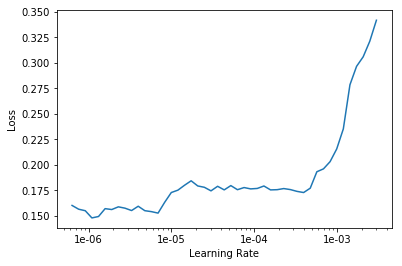

In [0]:
#unfreezing all layers and training on them
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

#Tuning for Learning Rate and Epochs

In [0]:
#fit again for optimized learning rate range
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.157231,0.339609,0.108896,01:04
1,0.159812,0.333930,0.107362,01:04
2,0.160482,0.342209,0.107362,01:04
3,0.153778,0.343841,0.110429,01:04


In [0]:
 #save model
  learn.save('object-detection-stage-1')

In [0]:
learn.export('exportpickle')

#Visualizing Performance

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
#show worst predictions
interp.plot_top_losses(9,figsize = (15,15))

#Testing on google Images

In [0]:
#creating test folders
os.mkdir('ring')
os.mkdir('bracelet')
os.mkdir('necklace')
os.mkdir('earring')
os.mkdir('jewelry')

In [0]:
#bringing classification folders into main folder
shutil.move('/content/ring','/content/jewelry')
shutil.move('/content/earring','/content/jewelry')
shutil.move('/content/necklace','/content/jewelry')
shutil.move('/content/bracelet','/content/jewelry')

In [0]:
from google.colab import files

In [0]:
#uploading test images from google
files.upload()

In [0]:
# moving images csv's into main folder
shutil.move('/content/bracelet.csv','/content/jewelry')
shutil.move('/content/earring.csv','/content/jewelry')
shutil.move('/content/necklace.csv','/content/jewelry')
shutil.move('/content/ring.csv','/content/jewelry')

In [0]:
path = Path('/content/jewelry')

In [0]:
#downloading test images to respective classification folders
path = Path('/content/jewelry')
for file, folder in [('bracelet3.csv', 'bracelet')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

In [0]:
folder_list = ['bracelet', 'earring', 'necklace', 'ring']

In [0]:
#verifying and cleaning images of unreadable jpegs
for folder in folder_list:
  verify_images(path/folder,max_size = 500,delete = True)

In [0]:
#Bunching together test data
data_test = ImageDataBunch.from_folder(path,train = '.',valid_pct = 0,num_workers = 4,
                                           ds_tfms = tfms,
                                           size = 224).normalize(imagenet_stats)

In [0]:
data_test

In [0]:
data_test.classes

In [0]:
learn = cnn_learner(data,models.resnet101)
learn.load('object-detection-stage-1')

##Calculating accuracy

In [0]:
def pred_class(data_test):
  """
  Creates a list of the predicted classes from the new test data set
  """
  actual_class = []
  predicted_class = []
  error = []
  
  for idx in range(len(data_test.train_ds)-1):
    pred_class, pred_idx, outputs = learn.predict(data_test.train_ds[idx][0])
    actual_class.append(data_test.train_ds[idx][1])
    predicted_class.append(pred_class)
    
    if pred_class != data_test.train_ds[idx][1]:
      error.append(1)
    else:
      error.append(0)
    
  error_rate = sum(error)/len(actual_class)
  
  return actual_class, predicted_class, error, error_rate
  
actual_class, predicted_class, error, error_rate = pred_class(data_test)

In [0]:
error_rate

##Viewing Individual Images in a Data Bunch

In [0]:
img = open_image(path/'ring'/'ring_007.jpg')
img